In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

- tipos de variaveis

1. numericas: sao numeros, podendo elas ser discretas ou continuas, quando os numeros forem bem grandes e diferentes, mesmo que ainda sejam inteiros, podemos classifica-los como continuos
2. categoricas: strings, sendo elas nominal(nao ordenados) ou ordinal(que podemos colocar uma ordem, como tamanho de roupa) 

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Pre processamento(base de dados de credito)

Usar varios tipos de grafico nessa parte é muito importante para gerar bons inseghts

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/credit_data.csv')

In [ ]:
df.shape

(2000, 5)

In [ ]:
df.sample(5)

,clientid,income,age,loan,default
1969,1970,56441.016244,43.206991,9043.756044,0
430,431,27533.001329,46.765928,1551.420288,0
1020,1021,49517.722328,31.549318,7337.950431,1
627,628,23886.567615,34.442973,4440.419617,1
1215,1216,32348.450150,59.752387,3229.820063,0


- default -> pagou ou nao o emprestimo(numerica discreta)
- clientid -> id do cliente(variavel nominal)
- income -> renda anual(numerica continua) 
- loan -> dívida que a pessoa possui(numerica continua)

In [ ]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
df[df['income'] >= 69995.685578] # cliente com maior salario

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
df[df['loan'] <= 1.377630	] # cliente com menor divida

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


## graficos





In [ ]:
np.unique(df['default'], return_counts= True)

(array([0, 1]), array([1717,  283]))

In [ ]:
df['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

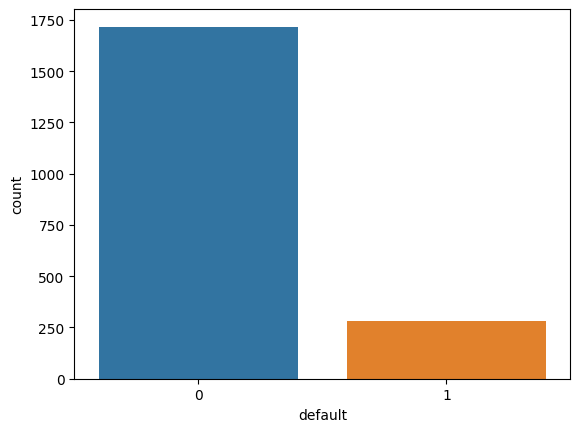

In [ ]:
sns.countplot(x = df['default'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

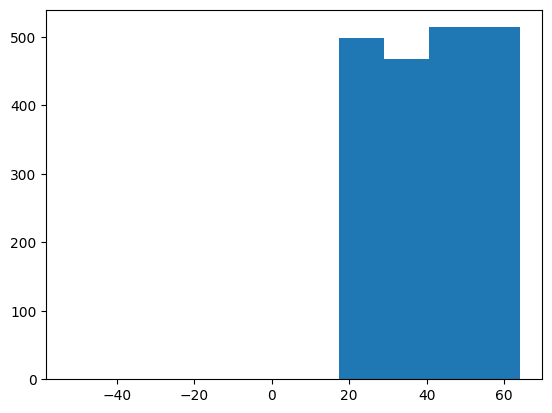

In [ ]:
plt.hist(x=df['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

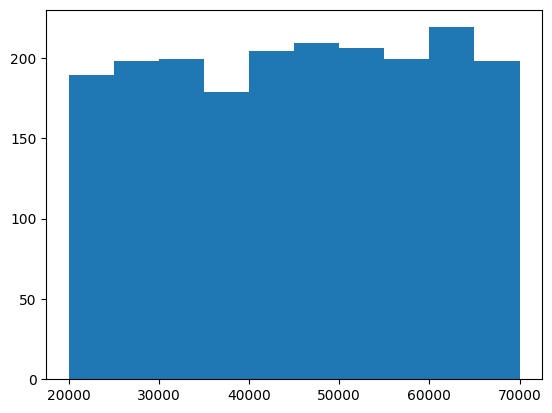

In [ ]:
plt.hist(x = df['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

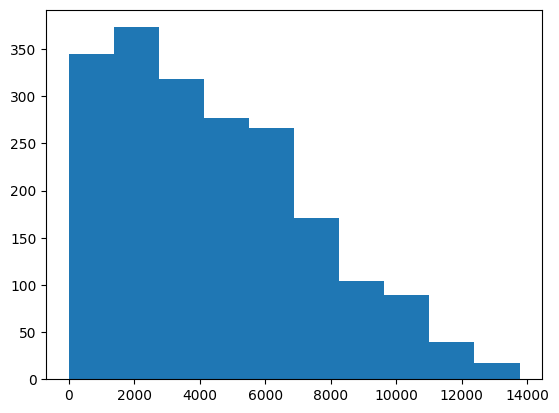

In [ ]:
plt.hist(x = df['loan'])

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

## valores inconsistentes
 

na nossa base de dados é possivel perceber que temos valores inconsistentes, como idade negativa




In [ ]:
df[df['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


caso a maioria dos dados de uma coluna seja invalido, devemos apagar a coluna

senao, podemos simplesmente apagar a lnha, ou substituir o valor invalido pela media, max, min, ... ou ate preenche-los manualmente

In [ ]:
# para esse caso, vamos trocar pela media
# df['age'].mean()
# porem essa media esta sendo calculada contanto com os valores negativos, vamos alteraar
df[df['age'] > 0]['age'].mean()

40.92770044906149

In [ ]:
df.loc[df['age'] < 0, 'age'] = 40.92

In [ ]:
df[df['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
df.head(27) # os index dos valores inconsistenes eram 15, 21, 26

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
# visualizando graficos sem os valores negativos para idade
grafico = px.scatter_matrix(df, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()


## Tratamento de valores faltantes(NaN)

In [ ]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
df.loc[pd.isnull(df['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
df.loc[pd.isnull(df['age'])]

,clientid,income,age,loan,default


In [ ]:
df.loc[df['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


## Divisão entre preditores e classe

In [ ]:
df.sample(5)

,clientid,income,age,loan,default
1870,1871,49501.905921,50.788112,2226.819580,0
1985,1986,22371.522191,39.142225,2291.856428,0
664,665,48334.387776,53.367754,2234.443137,0
1779,1780,34238.530293,63.434188,6002.935110,0
101,102,41285.172307,47.976308,2313.825005,0


In [ ]:
X = df.iloc[:, 1:4].values 
y = df.iloc[:, 4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

## Escolonamento dos atributos 

padronização -> mais indicado quando temos outliers
normalização


In [ ]:
X[:,0].min(), X[:,1].min(), X[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X[:,0].max(), X[:,1].max(), X[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

podemos perceber quew ha uma grande diferença entre minimos e maximos a depender da coluna, fazendo com que nosso modelo posso erronicamente interpretar que um seja mais importante do que outro

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X[:,0].min(), X[:,1].min(), X[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
X[:,0].max(), X[:,1].max(), X[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

Depois da padronização achamos valores em escalas proximas

# Trabalhando com outra base de dados(censo)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/census.csv')

In [ ]:
df.sample(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
575,29,Private,350162,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,>50K
4296,41,Private,266510,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
17447,21,Private,152246,Some-college,10,Never-married,Handlers-cleaners,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
27977,35,Private,197719,Some-college,10,Never-married,Machine-op-inspct,Other-relative,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
4273,72,Private,38360,HS-grad,9,Widowed,Other-service,Unmarried,White,Female,0,0,16,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum() # Nao temos nenhum valor nulo nesse caso

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualização de dados

In [ ]:
np.unique(df['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

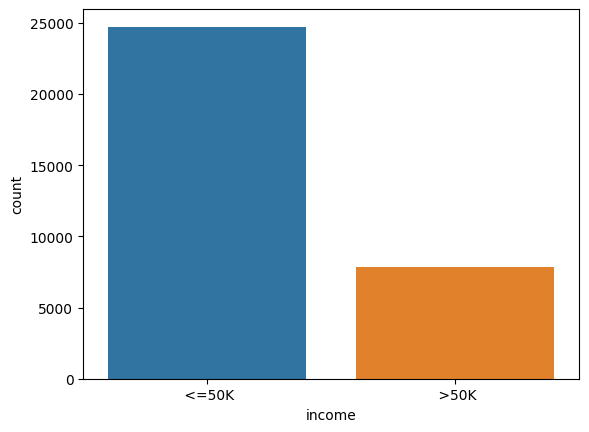

In [ ]:
# Vendo as classes de quem ganha mais ou menos de 50k
sns.countplot(x=df['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

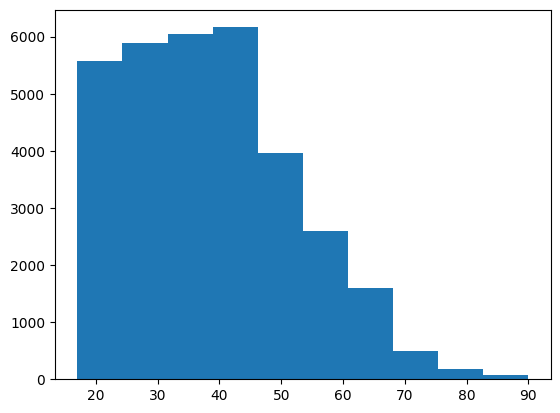

In [ ]:
# Olyuando distribuição das idades
plt.hist(x = df['age'])

In [ ]:
grafico = px.treemap(df, path=['workclass', 'age']) # vendo em qual setor as pessoas trabalham por idade
grafico.show()

In [ ]:
grafico = px.treemap(df, path=['income', 'occupation']) # vendo em qual categoria a pessoa esta por emprego
grafico.show()

In [ ]:
grafico = px.parallel_categories(df, dimensions=['occupation', 'income']) #outra forma de ver a relação entre renda e ocupação
grafico.show()

In [ ]:
grafico = px.parallel_categories(df, dimensions=['education-num', 'income']) #outra forma de ver a relação entre renda e quantos anos a pessoa estudou
grafico.show()

## divisão entre previsores e classe

In [ ]:
X_census = df.iloc[:, 0:14].values # o primeiro ':' indicade que queremos todas as linhas, e '0:14' indica que quetemos das colunas 0-13, excluindo justamente a 14 - income
y_census = df.iloc[:, 14].values

In [ ]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

## tratamento dos atributos categoricos


**LabelEncoder** -> existe a desvantagem que se tiver muitas categorias vao ter muitas variaveis, fazendo com que possivelmente o algoritmo considere uma varievel erroniamente mais importante que outra

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
df.head(1)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [ ]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

Agora todas as variaveis de x sao numricas

**OneHotEncoder** -> vamos fazer varias colunas com dados binarios, para cada coluna categorica com X valores diferentes, faremos X colunas binarias, sendo o 0 pra se pertence a ela, e 1 para se pertence

In [ ]:
for coluna in df.columns:
    print(len(np.unique(df[coluna])))

73
9
21648
16
16
7
15
6
5
2
119
92
94
42
2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# A lista indica quais sao as colunas selecionadas
ohe = ColumnTransformer(transformers=[('OneHot',  OneHotEncoder(), [1,3,5,6, 7,8,9,13])], remainder='passthrough') # Indica que nao ira apagar os outros atributor

In [ ]:
X_census = ohe.fit_transform(X_census).toarray()

In [ ]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
X.shape # Aumentou o numero de colunas, uma vez que o OneHot cria novas colunas

(2000, 3)

Na maioria dos casos, usamos o onehot seguido do label

## Escalonamento dos valores

deixando todos na mesma escala

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_census = scaler.fit_transform(X_census)
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## separando dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Credit data(base de dados 1)
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
X_credit_train.shape

(1500, 3)

In [ ]:
y_credit_train.shape

(1500,)

In [ ]:
# Census(base de dados 2)
X_census_train, X_censust_test, y_census_train, y_census_test = train_test_split(X_census, y_census, test_size = 0.15, random_state=0)

In [ ]:
X_census_train.shape

(27676, 108)

In [ ]:
y_census_train.shape

(27676,)

Nesse caso, nos tivemos que colocar o parametro test_size maior para a base de dados de credito, uma vez que ela tem bem menos valores comparado a do census

## salvando as base de dados

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode='wb') as f:
  pickle.dump([X_credit_train, X_credit_test, y_credit_train, y_credit_test], f)

In [ ]:
with open('census.pkl', mode='wb') as f:
  pickle.dump([X_census_train, X_censust_test, y_census_train, y_census_test], f)